In [46]:
import numpy as np
import pandas as pd

## Array

#### Sieve of Eratosthenes

In [14]:
def primes_till(n):
    primes = [True]*(n+1)
    primes[0] = primes[1] = False
    
    for i in range(2,n+1):
        if i*i > n:
            break
        if primes[i]:
            for j in range(i*2,n+1,i):
                primes[j] = False

    return [i for i,val in enumerate(primes) if val]
            


In [17]:
primes_till(10)

[2, 3, 5, 7]

#### Sort array of 0,1


In [20]:
def sort_01(arr):
    lo = 0
    hi = len(arr)-1

    while lo <= hi:
        while arr[lo] == 0:  # find 1 from l->R
            lo += 1            
        while arr[hi] == 1: # find 0 from R<-L
            hi -= 1

        if lo >= hi:
            break
        arr[lo],arr[hi] = arr[hi],arr[lo]
        lo += 1
        hi -= 1
        # print(arr,lo,hi)

    return arr

In [21]:
arr = [1,0,0,1,1,0,1,0,0,0,1]
print(sort_01(arr))

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


#### Sort array of 0,1,2 : Dutch National Flag Algorithm

In [2]:
def DNF(arr):
    '''
    lo, cur, hi <- cur iterates and swaps...
    0s in between : 0<->lo
    2s in between : hi<->N
    1s get auto-filles betwwen lo<->hi
    At any points.. i<lo : 0s filled, i>hi : 2s filled
    '''

    lo = cur = 0
    hi = len(arr)-1

    while cur <= hi: # mid>hi, stop(everything after hi is already 2)
        if arr[cur] == 0:
            arr[lo],arr[cur] = arr[cur], arr[lo]
            lo += 1
            cur += 1
        elif arr[cur] == 2:
            arr[cur],arr[hi] = arr[hi], arr[cur]
            hi -= 1
        else:
            cur += 1
    return arr


In [4]:
arr = [0,2,1,2,1,0,0,0,0,2]
print(DNF([2,0,1]))

[0, 1, 2]


In [1]:
'''
Q> Why swap(hi--,cur), swap(lo++,cur++) 
-> hi = {0,1,2}
2,1 -> no problem
if its 0, then if u increment mid -> It will move ahead

BUT, always cur > low, so everything before mid is already in place [0 or 1]
'''

'\nQ> Why swap(hi--,mid), swap(lo++,mid++) \n-> hi = {0,1,2}\n2,1 -> no problem\nif its 0, then if u increment mid -> It will move ahead\n\nBUT, always mid > low, so everything before mid is already in place [0 or 1]\n'

#### Subarray Sum = 0

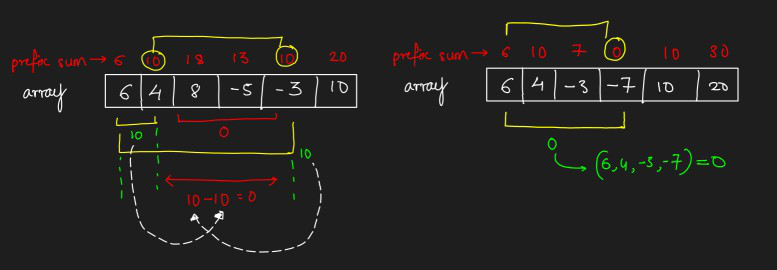

In [10]:
display(Image.open('src/subarray_sum_0.jpg'))

Solution
1. Calculate Prefix sum
2. While calculating prefix sum array, 
    - if `cur_sum` was previously seen
        - THEN, arr[`last_seen_sum_index`+1 : `cur_sum_index`] = 0  
    - if `cur_sum` = 0,
        - then, arr[0 : `cur_sum_index`] = 0


In [10]:
def check_zero_sum(arr):
    '''
    Return [start_index, end_index] which has subarray sum = 0
    '''
    n = len(arr)
    curSum = 0
    hist = {}

    curSum = 0
    for i,x in enumerate(arr):
        curSum += x
        if x in hist:
            return (hist[x]+1,i)
        elif curSum == 0:
            return (0,i)
        else:
            hist[curSum] = i
    return None


In [11]:
arr = [10, 20, -30, 1, 6]
check_zero_sum(arr)

(0, 2)

#### Max Subarray Sum - Kadanes
( Doesnt give length or exact elements )

In [36]:
def kadanes(arr):
    '''
    Return maximum subarary sum (only sum not indices)
    '''
    max_res = 0
    curSum = 0
    startIndex = endIndex = 0
    for idx, x in enumerate(arr):
        curSum += x
        if curSum < 0:
            curSum = 0
        else:
            max_res = max(max_res, curSum)
    print(startIndex, endIndex)
    return max_res

In [39]:
arr = [-2, -3, 4, -1, -2, 1, 5, -3]
print(kadanes(arr))

0 0
7


#### Two, Three Sum

In [46]:
def two_sum(arr, target):
    '''
    Return (x,y) E arr, x+y = target
    '''
    hmap = set()
    for x in arr:
        remSum = target-x
        if remSum in hmap:
            return (remSum,x)
        else:
            hmap.add(x)
    return None
    

In [50]:
def three_sum(arr, target):
    n = len(arr)
    for i, x in enumerate(arr[:-1]):
        twoSumRes = two_sum(arr[i:], target-x)
        if twoSumRes is not None:
            return (twoSumRes[0], twoSumRes[1], x)
    return None

        

In [52]:
arr = [11,2,8,12,-7,23,40,10]
three_sum(arr,63)


(12, 40, 11)

#### Max Length Subarray Sum with given Target 
( Prefix Method : Gives exact elements and one giving max length ) 

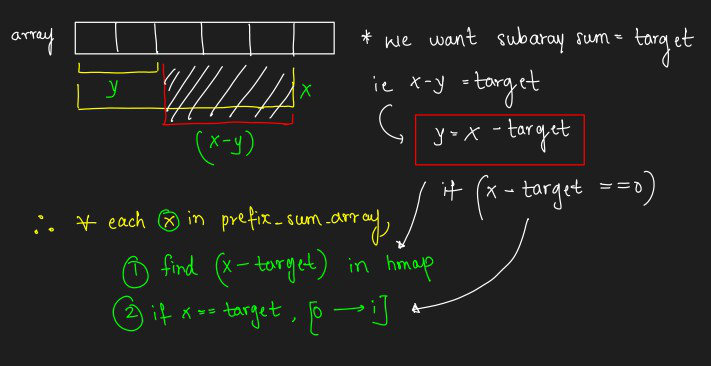

In [9]:
display(Image.open('src/max_len_subarray_sum.jpg'))

In [108]:
def longest_subarray_target(arr, target):
    n = len(arr)
    cSum = maxLen = 0
    hmap = {}
    resIndex = [0,0]

    for i, x in enumerate(arr):
        cSum += x
        findHmap = cSum-target
        if cSum == target:
            newLen = i+1
            if newLen > maxLen:
                maxLen = newLen
                resIndex[0], resIndex[1] = 0, i
        elif findHmap in hmap: # Target found
            newLen = i-hmap[findHmap]
            if newLen > maxLen:
                maxLen = newLen
                resIndex[0], resIndex[1] = hmap[findHmap]+1, i
        elif cSum not in hmap:  # why always add? [We need left most index -> longest subarray, so if a sum is already there dont add newwer one]
            hmap[cSum] = i
            
    return (maxLen, resIndex)

In [109]:
arr = [5,6,-5,5,3,5,3,-2,0]
arr = [5,5,-5,-5,2]
# longest_subarray_target(arr, 8)
longest_subarray_target(arr, 2)

(5, [0, 4])

#### Equilibrium Point

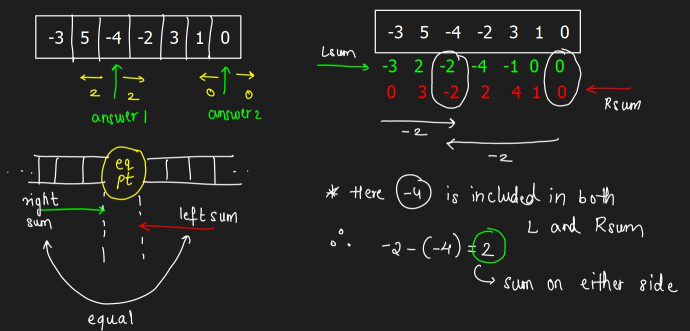

In [7]:
display(Image.open('src/Equilibrium_Point.jpg'))

In [128]:
def equilibrium(arr):
    '''
    Return equilibrium point
    '''
    n = len(arr)
    lSum = [0]*n

    cSum = 0
    for i in range(n):  # L->R Sum
        cSum += arr[i]
        lSum[i] = cSum

    cSum = 0
    for i in reversed(range(n)):  # L<-R Sum
        cSum += arr[i]
        if cSum == lSum[i]:
            return i
    return None
    
    

In [129]:
arr = [-3,5,-4,-2,3,1]
equilibrium(arr)

2

#### Stock Buy/Sell

In [9]:
# Single Buy/Sell
def max_profit_single(prices):
    max_profit = 0
    min_till_now = prices[0]

    for x in prices:
        max_profit = max(x-min_till_now, max_profit)
        min_till_now = min(x, min_till_now)

    return max_profit

# Multiple buy/sell ( But can hold only one stock at a time)
def max_profit(prices):
    '''
    If you find any local_minima -> add to profit
    '''
    n = len(prices)
    profit = 0

    for i in range(n-1):
        if prices[i] < prices[i+1]:
            profit += prices[i+1]-prices[i]

    return profit

In [10]:
arr1 = [7,1,5,3,6,4] # Expected 5
arr2 = [7,6,4,3,1] # Expected : 0

print(max_profit_single(arr1))

arr3 = [7,1,5,3,6,4] # expected 7
print(max_profit(arr3))


5
7


#### Cyclic Sort


Given a array of length `n` having numbers from `1 to n` , sort them in linear time

**Core Idea** : Element `n` should be at index `n-1` (1 at 0, 2 at 1)

In [19]:
def cyclic_sort(arr):
    n = len(arr)
    i = 0

    while i<n:
        correctIndex = arr[i]-1
        if i != correctIndex:
            arr[i],arr[correctIndex] = arr[correctIndex], arr[i]
        else:
            i += 1
    
    return arr

In [20]:
arr = [3,2,5,1,4]
cyclic_sort(arr)

[1, 2, 3, 4, 5]

## Searching / Sorting

#### Binary Search

In [72]:
def bin_search(arr, target, start=None, end=None) -> int:
    n = len(arr)
    lo = start if start else 0
    hi = end if end else n-1

    if hi == lo and arr[hi]==target: # IMPORTANT -> [5], [4] 
        return lo

    while lo <= hi: # IMPORTANT -> (use <= if key lies first or last index)
        mid = lo + ((hi-lo)//2)
        if arr[mid] == target:
            return mid
        elif arr[mid] > target:
            hi = mid-1
        else:
            lo = mid+1
    return -1


In [73]:
arr = [2,5]
bin_search(arr,2)

0

In [70]:
arr = [1,2,3,40,50,99,100]
bin_search(arr, 100)

6

#### First/Last Occurence in sorted array

In [65]:
def first_occurence(arr, target):
    n = len(arr)
    lo = 0
    hi = n-1
    firstOcc = -1

    while lo<=hi:
        mid = lo + ((hi-lo)//2)
        if arr[mid]==target: # if same store and move left-side
            firstOcc = mid
            hi = mid-1
        elif arr[mid] > target:
            hi = mid-1
        else:
            lo = mid+1

    return firstOcc


def last_occurence(arr, target):
    n = len(arr)
    lo = 0
    hi = n-1
    lastOcc = -1

    while lo<hi:
        mid = lo + ((hi-lo)//2)
        if arr[mid]==target: # if same store and move right-side
            lastOcc = mid
            lo = mid+1
        elif arr[mid] > target:
            hi = mid-1
        else:
            lo = mid+1

    return lastOcc


In [66]:
arr = [2,2,2,3,3,3,3,3,3,5,5,5,5]
# arr = [2,2,3,3,3,5,5]
print(first_occurence(arr,2))
print(first_occurence(arr,3))
print(first_occurence(arr,5),"\n")

print(last_occurence(arr,2))
print(last_occurence(arr,3))
print(last_occurence(arr,5))

0
3
9 

2
7
11


#### Find Square root using BinSearch (Given exists)

In [67]:
def get_square_root(n):
    lo = 0
    hi = n//2

    n_iters = 0

    while lo <= hi:
        n_iters += 1
        mid = lo + ((hi-lo)//2)

        if mid**2 == n:
            print("Iterations: ",n_iters,end=" | -> Answer:")
            return mid
        elif mid**2 > n:
            hi = mid-1
        else:
            lo = mid+1

    
    return -1


In [68]:
print(get_square_root(144))
print(get_square_root(2500))

Iterations:  4 | -> Answer:12
Iterations:  10 | -> Answer:50


#### Search in Rotate Sorted array


Steps : Find Pivot (Use Binary Search) -> Binary Search on left and right parts (which are already sorted)

Pivot Ele : First element of right sorted array
[4,5,6,1,2,3] pivot = 1

In [ ]:
def find_rotate_pivot(arr):
    n = len(arr)
    lo = 0
    hi = n-1

    while lo <= hi:
        mid = lo + ((hi-lo)//2)

        if mid == 0:
            if arr[mid] > arr[mid-1]:
                return mid
        elif mid == n-1: 
            if arr[mid-1] > arr[mid]:
                return mid

        elif arr[mid-1] > arr[mid]:
            return mid
        elif arr[mid-1] <= arr[mid]:
            hi = mid-1
        

In [61]:
arr = [3,4,5,1,2] # pivot = 5

#### First Bad Version

[Leetcode Link](https://leetcode.com/problems/first-bad-version)
- If one version is bad all versions following it will be bad
- Suppose you have n versions [1, 2, ..., n] and you want to find out the first bad one, which causes all the following ones to be bad.
- You are given an API bool isBadVersion(version) which returns whether version is bad. Implement a function to find the first bad version. You should minimize the number of calls to the API.

In [74]:

def firstBadVersion(self, n: int) -> int:
    lo = 1
    hi = n
    
    if n == 1:
        return 1
    
    while lo <= hi:
        mid = lo + ((hi-lo)//2) 
        
        if isBadVersion(mid): # if bad -> There may also be bad ones at the left
            if not isBadVersion(mid-1):
                return mid
            hi = mid-1
        else: # if not bad move right 
            lo = mid+1
    

## Linked Lists

#### Reverse LL

In [9]:
def reverseList(self, head):
    prev = None
    next = None
    cur = head

    while cur is not None:
        next = cur.next
        cur.next = prev
        prev = cur
        cur = next
    return prev

#### Mid in Linked List

In [ ]:
def middleNode(self, head):
    slow = head
    fast = head

    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next

    return slow


## Graphs

#### Graph DS

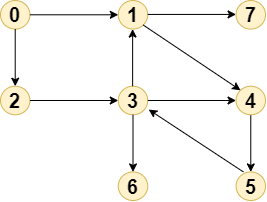

In [25]:
display(Image.open('src/graph0.png'))

In [2]:
adj = [
    [0, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 1],
    [0, 0, 0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0]
]

#### BFS

In [3]:
# Use QUEUE
def BFS(adj, src):
    n = len(adj[0]) # nodes = (0, n-1)
    queue = []
    queue.append(src)
    vis = [False]*n

    vis[src] = True
    while len(queue) != 0:
        cur_node = queue.pop(0)
        for node in range(n): # visit all nbrs of Node
            if adj[cur_node][node] == 1 and not vis[node]:
                queue.append(node)
                vis[node] = True
        print(cur_node,"->",end="")
    
    print()

In [4]:
BFS(adj,0)

0 ->1 ->2 ->4 ->7 ->3 ->5 ->6 ->


#### DFS

In [5]:
# Use STACK
def DFS(adj, src):
    n = len(adj[0]) # nodes = (0, n-1)
    queue = []
    queue.append(src)
    vis = [False]*n

    vis[src] = True
    while len(queue) != 0:
        cur_node = queue.pop()
        for node in range(n): # visit all nbrs of Node
            if adj[cur_node][node] == 1 and not vis[node]:
                queue.append(node)
                vis[node] = True
        print(cur_node,"->",end="")
    
    print()

# Use STACK
vis = []
def DFS_calls(src,adj):
    global vis
    print(src,"->",end="")
    vis[src] = True

    for node in range(len(adj[0])):
        if adj[src][node] != 0 and not vis[node]:
            DFS_calls(node,adj)



In [6]:
DFS(adj,0)

vis = [False]*(len(adj[0]))
DFS(adj,0)

0 ->2 ->3 ->6 ->4 ->5 ->1 ->7 ->
0 ->2 ->3 ->6 ->4 ->5 ->1 ->7 ->


#### Number of Islands

- When you do DFS/BFS it traverses all connected nodes
- If it doesnt visit any row -> its a island

Algo
1. Run algo on SRC (islands=1)
2. For each remaining univisited nodes (islands++)

[Leetcode Link](https://leetcode.com/problems/number-of-islands/submissions/)

In [ ]:
class Solution:
    ROW = COL = 0
    arr = []
    
    def is_valid(self,i,j):
        return i>=0 and j>=0 and i<self.ROW and j<self.COL and self.arr[i][j] == "1"
    
    def dfs(self, i, j):
        self.arr[i][j] = "0"

        if self.is_valid(i,j+1):
            self.dfs(i,j+1)
        if self.is_valid(i+1,j):
            self.dfs(i+1,j)
        if self.is_valid(i-1,j):
            self.dfs(i-1,j)
        if self.is_valid(i,j-1):
            self.dfs(i,j-1)
        
        
    def numIslands(self, grid):
        self.ROW = len(grid)
        self.COL = len(grid[0])
        self.arr = grid
        nIslands = 0
        
        for i in range(self.ROW):
            for j in range(self.COL):
                if self.arr[i][j] == "1":
                    nIslands += 1
                    self.dfs(i,j)
        return nIslands

        

#### Djikstras

**Single Source Shortest Path*** : Distance from `src` to all nodes

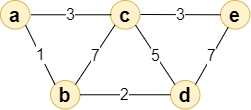

In [13]:
display(Image.open('src/Graph_Djikstra.png'))

**Algorithm**
<br><Br>
`dist[]` <- Contains min distance from src, dist[src] = 0<br>
`vis[]` <- Check if node is visited<br>

1. Pick a `node` with highest priority (Node which hasnt been visited and least distance) <br>and mark it as visited
2. Visit all nbrs of `node`.
    - if `nbr` is already visited, dont process
    - new_dist = dist[node] + dist from `node`->`nbr`
    - update new_dist if its smaller than dist[node]
3. Repeat 1 and 2 untill all nodes are visited or `|V|-1` times

In [71]:
class Djikstra:
    def __init__(self, adj, src) :
        '''
        adj : adjacency list
        vis : track if node is visited
        dist : min_distance from src to all nodes
        '''
        self.adj = adj
        self.vis = { key:False for key in self.adj.keys() }
        self.dist = { key:float('inf') for key in self.adj.keys() }
        self.src = src
        self.dist[self.src] = 0
    
    def get_vertex_priority(self):
        '''
        Return Node which hasnt been visited and has smallest min_dist
        '''
        min_dist = float('inf')
        sel_node = None
        for node, dist in self.dist.items():
            if not self.vis[node] and dist<min_dist:
                min_dist = dist
                sel_node = node
        return sel_node


    def run(self):
        for _ in range(len(self.adj.keys())):
            node = self.get_vertex_priority()
            self.vis[node] = True
            print("Visited node :",node,"| Distances: ",self.dist)
            
            for nbr,wt in self.adj[node].items(): # Visit all nbrs of [NODE]
                if not self.vis[nbr]:
                    new_dist = self.dist[node] + self.adj[node][nbr]
                    self.dist[nbr] = min(new_dist, self.dist[nbr])

        print("Shortest Distances: ",self.dist)



In [73]:
adj = {
    'A':{'B':1,'C':3},
    'B':{'A':1,'C':7,'D':2},
    'C':{'A':3,'B':7,'D':5,'E':1},
    'D':{'B':2,'C':5,'E':7},
    'E':{'C':1,'D':7}
}
dj = Djikstra(adj, 'B')
dj.run()
dj.dist


Visited node : B | Distances:  {'A': inf, 'B': 0, 'C': inf, 'D': inf, 'E': inf}
Visited node : A | Distances:  {'A': 1, 'B': 0, 'C': 7, 'D': 2, 'E': inf}
Visited node : D | Distances:  {'A': 1, 'B': 0, 'C': 4, 'D': 2, 'E': inf}
Visited node : C | Distances:  {'A': 1, 'B': 0, 'C': 4, 'D': 2, 'E': 9}
Visited node : E | Distances:  {'A': 1, 'B': 0, 'C': 4, 'D': 2, 'E': 5}
Shortest Distances:  {'A': 1, 'B': 0, 'C': 4, 'D': 2, 'E': 5}


{'A': 1, 'B': 0, 'C': 4, 'D': 2, 'E': 5}

## Tree

## Recursion + DP

## Math